In [44]:
import pandas as pd
import seaborn as sns

url = 'marketing_customer_analysis_clean.csv'
df = pd.read_csv(url)

In [45]:
# Separate the columns
categoricals_df = df.select_dtypes(include='object')
numericals_df = df.select_dtypes(include='number')

## Categorical

In [46]:
# Create new Dataframes splitt in nominal and ordinal
nominal_columns = ['state', 'response', 'employmentstatus', 'gender', 
                   'location_code', 'marital_status', 'policy_type', 
                   'sales_channel', 'policy','vehicle_class', 'vehicle_type', 'renew_offer_type']
nominal_df = categoricals_df[nominal_columns]

In [47]:
# Create new Dataframes splitt in nominal and ordinal
ordinal_columns = ['coverage','education', 'vehicle_size']
ordinal_df = categoricals_df[ordinal_columns]

In [48]:
# get_dummies with all the norminal columns
con_norminals_df = pd.get_dummies(nominal_df, dtype=int)
con_norminals_df

,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,response_No,response_Yes,employmentstatus_Disabled,employmentstatus_Employed,employmentstatus_Medical Leave,...,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_type_A,renew_offer_type_Offer1,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4
0,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
1,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,0,0,1,1,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0
3,0,0,0,1,0,0,1,0,1,0,...,0,0,0,0,0,1,0,1,0,0
4,0,0,0,1,0,1,0,0,0,1,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,0,0,1,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
10906,0,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
10907,1,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,1,0,0,0
10908,0,1,0,0,0,1,0,0,1,0,...,0,0,1,0,0,1,1,0,0,0


In [49]:
from sklearn.preprocessing import OrdinalEncoder

# For 'coverage' column
enc = OrdinalEncoder(categories=[['Basic', 'Extended', 'Premium']])
ordinal_df['coverage'] = enc.fit_transform(ordinal_df[['coverage']])

# For 'education' column
enc = OrdinalEncoder(categories=[['High School or Below', 'Bachelor', 'College', 'Master', 'Doctor']])
ordinal_df['education'] = enc.fit_transform(ordinal_df[['education']])

# For 'vehicle_size' column
enc = OrdinalEncoder(categories=[['Small', 'Medsize', 'Large']])
ordinal_df['vehicle_size'] = enc.fit_transform(ordinal_df[['vehicle_size']])

C:\Users\vonke\AppData\Local\Temp\ipykernel_12568\864033165.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ordinal_df['coverage'] = enc.fit_transform(ordinal_df[['coverage']])
C:\Users\vonke\AppData\Local\Temp\ipykernel_12568\864033165.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ordinal_df['education'] = enc.fit_transform(ordinal_df[['education']])
C:\Users\vonke\AppData\Local\Temp\ipykernel_12568\864033165.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

In [50]:
# Concat the two categorical Dataframes

result_categorical_df = pd.concat([ordinal_df, con_norminals_df], axis=1)
result_categorical_df

,coverage,education,vehicle_size,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,response_No,response_Yes,...,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_type_A,renew_offer_type_Offer1,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4
0,0.0,2.0,1.0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
1,0.0,2.0,1.0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
2,0.0,1.0,1.0,0,0,0,0,1,1,0,...,0,0,1,0,0,1,0,0,1,0
3,1.0,2.0,1.0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,1,0,0
4,2.0,1.0,1.0,0,0,0,1,0,1,0,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,2.0,1.0,1.0,0,0,1,0,0,1,0,...,1,0,0,0,0,1,0,0,1,0
10906,0.0,2.0,1.0,0,0,0,1,0,1,0,...,0,0,0,0,0,1,0,1,0,0
10907,1.0,1.0,1.0,1,0,0,0,0,1,0,...,0,1,0,0,0,1,1,0,0,0
10908,2.0,2.0,1.0,0,1,0,0,0,1,0,...,0,0,1,0,0,1,1,0,0,0


## Numberical

In [51]:
# Drop NAN and duplicates
numericals_df = numericals_df.dropna()
numericals_df = numericals_df.drop_duplicates()


## Concat both

In [52]:
final_df = pd.concat([result_categorical_df, numericals_df], axis=1)
final_df = final_df.drop(columns=['month', 'unnamed:_0'])
final_df

,coverage,education,vehicle_size,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,response_No,response_Yes,...,renew_offer_type_Offer3,renew_offer_type_Offer4,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,0.0,2.0,1.0,1,0,0,0,0,1,0,...,1,0,4809.216960,48029,61,7.000000,52,0.000000,9,292.800000
1,0.0,2.0,1.0,0,1,0,0,0,1,0,...,0,1,2228.525238,0,64,3.000000,26,0.000000,1,744.924331
2,0.0,1.0,1.0,0,0,0,0,1,1,0,...,1,0,14947.917300,22139,100,34.000000,31,0.000000,2,480.000000
3,1.0,2.0,1.0,0,0,0,1,0,0,1,...,0,0,22332.439460,49078,97,10.000000,3,0.000000,2,484.013411
4,2.0,1.0,1.0,0,0,0,1,0,1,0,...,0,0,9025.067525,23675,117,15.149071,31,0.384256,7,707.925645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,2.0,1.0,1.0,0,0,1,0,0,1,0,...,1,0,15563.369440,0,253,15.149071,40,0.384256,7,1214.400000
10906,0.0,2.0,1.0,0,0,0,1,0,1,0,...,0,0,5259.444853,61146,65,7.000000,68,0.000000,6,273.018929
10907,1.0,1.0,1.0,1,0,0,0,0,1,0,...,0,0,23893.304100,39837,201,11.000000,63,0.000000,2,381.306996
10908,2.0,2.0,1.0,0,1,0,0,0,1,0,...,0,0,11971.977650,64195,158,0.000000,27,4.000000,6,618.288849


### X-y Splitt

In [53]:
final_df.columns

Index(['coverage', 'education', 'vehicle_size', 'state_Arizona',
       'state_California', 'state_Nevada', 'state_Oregon', 'state_Washington',
       'response_No', 'response_Yes', 'employmentstatus_Disabled',
       'employmentstatus_Employed', 'employmentstatus_Medical Leave',
       'employmentstatus_Retired', 'employmentstatus_Unemployed', 'gender_F',
       'gender_M', 'location_code_Rural', 'location_code_Suburban',
       'location_code_Urban', 'marital_status_Divorced',
       'marital_status_Married', 'marital_status_Single',
       'policy_type_Corporate Auto', 'policy_type_Personal Auto',
       'policy_type_Special Auto', 'sales_channel_Agent',
       'sales_channel_Branch', 'sales_channel_Call Center',
       'sales_channel_Web', 'policy_Corporate L1', 'policy_Corporate L2',
       'policy_Corporate L3', 'policy_Personal L1', 'policy_Personal L2',
       'policy_Personal L3', 'policy_Special L1', 'policy_Special L2',
       'policy_Special L3', 'vehicle_class_Four-Door Ca

In [54]:
X = final_df[['coverage', 'education', 'vehicle_size', 'state_Arizona',
       'state_California', 'state_Nevada', 'state_Oregon', 'state_Washington',
       'response_No', 'response_Yes', 'employmentstatus_Disabled',
       'employmentstatus_Employed', 'employmentstatus_Medical Leave',
       'employmentstatus_Retired', 'employmentstatus_Unemployed', 'gender_F',
       'gender_M', 'location_code_Rural', 'location_code_Suburban',
       'location_code_Urban', 'marital_status_Divorced',
       'marital_status_Married', 'marital_status_Single',
       'policy_type_Corporate Auto', 'policy_type_Personal Auto',
       'policy_type_Special Auto', 'sales_channel_Agent',
       'sales_channel_Branch', 'sales_channel_Call Center',
       'sales_channel_Web', 'policy_Corporate L1', 'policy_Corporate L2',
       'policy_Corporate L3', 'policy_Personal L1', 'policy_Personal L2',
       'policy_Personal L3', 'policy_Special L1', 'policy_Special L2',
       'policy_Special L3', 'vehicle_class_Four-Door Car',
       'vehicle_class_Luxury Car', 'vehicle_class_Luxury SUV',
       'vehicle_class_SUV', 'vehicle_class_Sports Car',
       'vehicle_class_Two-Door Car', 'vehicle_type_A',
       'renew_offer_type_Offer1', 'renew_offer_type_Offer2',
       'renew_offer_type_Offer3', 'renew_offer_type_Offer4',
       'customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies']]
y = final_df[['total_claim_amount']]

### Train test split

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state= 42)

### Standardize the data (after the data split!)

In [56]:
from sklearn.preprocessing import MinMaxScaler

In [57]:
# MinMaxScaler X_train
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

In [58]:
# MinMaxScaler X_test
X_test = scaler.transform(X_test)


### Apply linear regression

In [59]:
from sklearn.linear_model import LinearRegression
ln = LinearRegression()
model = ln.fit(X_train, y_train)

In [60]:
model.coef_

array([[-1.71920171e+01, -2.77642235e+01, -6.05167925e+00,
        -2.79380259e+15, -2.79380259e+15, -2.79380259e+15,
        -2.79380259e+15, -2.79380259e+15, -1.17698935e+15,
        -1.17698935e+15, -3.61850756e+15, -3.61850756e+15,
        -3.61850756e+15, -3.61850756e+15, -3.61850756e+15,
         2.50496137e+15,  2.50496137e+15, -3.10054706e+15,
        -3.10054706e+15, -3.10054706e+15, -7.54256964e+15,
        -7.54256964e+15, -7.54256964e+15, -3.45779552e+15,
        -2.54074203e+15, -3.27556815e+15,  3.39478702e+15,
         3.39478702e+15,  3.39478702e+15,  3.39478702e+15,
         2.24212193e+14,  2.24212193e+14,  2.24212193e+14,
        -6.92841305e+14, -6.92841305e+14, -6.92841305e+14,
         4.19848191e+13,  4.19848191e+13,  4.19848191e+13,
        -6.76334917e+14, -6.76334917e+14, -6.76334917e+14,
        -6.76334917e+14, -6.76334917e+14, -6.76334917e+14,
        -4.00000000e+00,  3.24613694e+15,  3.24613694e+15,
         3.24613694e+15,  3.24613694e+15, -2.32500000e+0

In [61]:
model.intercept_

array([1.29964491e+16])

### Create predictions for the test set

In [62]:
y_pred = model.predict(X_test)

In [63]:
y_pred = pd.DataFrame(y_pred)

In [64]:
y_test = y_test.reset_index(drop=True)

In [65]:
residuals_df = pd.concat([y_test,y_pred], axis=1)

In [66]:
residuals_df = pd.concat([y_test,y_pred], axis=1)

In [67]:
residuals_df = residuals_df.rename(columns={'total_claim_amount': 'y_test',0: 'y_pred'})

In [68]:
residuals_df['residual'] = residuals_df['y_test'] - residuals_df['y_pred']

In [69]:
residuals_df

,y_test,y_pred,residual
0,475.423848,388.0,87.423848
1,350.400000,434.0,-83.600000
2,482.400000,554.0,-71.600000
3,673.342650,568.0,105.342650
4,302.400000,322.0,-19.600000
...,...,...,...
2723,460.266881,560.0,-99.733119
2724,405.883346,408.0,-2.116654
2725,41.182611,26.0,15.182611
2726,364.800000,492.0,-127.200000


### Calculating metrics

In [70]:
mean_error = residuals_df['residual'].mean()
mean_error

3.2933477272727267

In [71]:
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae
mse(y_test, y_pred)

19270.589404448532

In [72]:
import numpy as np
np.sqrt(mse(y_test, y_pred))

138.81854848848022

In [73]:
rmse = mse(y_test, y_pred, squared=False)
rmse

138.81854848848022

### Computing R2_score for test_set

In [74]:
from sklearn.metrics import r2_score
r2_test = round(r2_score(y_test, y_pred), 2)
r2_test

0.77

### Computing R2_score for train_set

In [75]:
y_pred_train = pd.DataFrame(model.predict(X_train))
r2_train = round(r2_score(y_train, y_pred_train), 2)
r2_train

0.77

### Test

In [76]:
features_names = list(X)
features_names

['coverage',
 'education',
 'vehicle_size',
 'state_Arizona',
 'state_California',
 'state_Nevada',
 'state_Oregon',
 'state_Washington',
 'response_No',
 'response_Yes',
 'employmentstatus_Disabled',
 'employmentstatus_Employed',
 'employmentstatus_Medical Leave',
 'employmentstatus_Retired',
 'employmentstatus_Unemployed',
 'gender_F',
 'gender_M',
 'location_code_Rural',
 'location_code_Suburban',
 'location_code_Urban',
 'marital_status_Divorced',
 'marital_status_Married',
 'marital_status_Single',
 'policy_type_Corporate Auto',
 'policy_type_Personal Auto',
 'policy_type_Special Auto',
 'sales_channel_Agent',
 'sales_channel_Branch',
 'sales_channel_Call Center',
 'sales_channel_Web',
 'policy_Corporate L1',
 'policy_Corporate L2',
 'policy_Corporate L3',
 'policy_Personal L1',
 'policy_Personal L2',
 'policy_Personal L3',
 'policy_Special L1',
 'policy_Special L2',
 'policy_Special L3',
 'vehicle_class_Four-Door Car',
 'vehicle_class_Luxury Car',
 'vehicle_class_Luxury SUV',
 'v

In [77]:
coefficients = model.coef_
coefficients = [i for i in coefficients[0]]

In [78]:
fi_dict = {'name':features_names, 'coeff':coefficients}
fi_df = pd.DataFrame(fi_dict)
fi_df

,name,coeff
0,coverage,-1.719202e+01
1,education,-2.776422e+01
2,vehicle_size,-6.051679e+00
3,state_Arizona,-2.793803e+15
4,state_California,-2.793803e+15
5,state_Nevada,-2.793803e+15
6,state_Oregon,-2.793803e+15
7,state_Washington,-2.793803e+15
8,response_No,-1.176989e+15
9,response_Yes,-1.176989e+15


<Axes: xlabel='coeff', ylabel='name'>

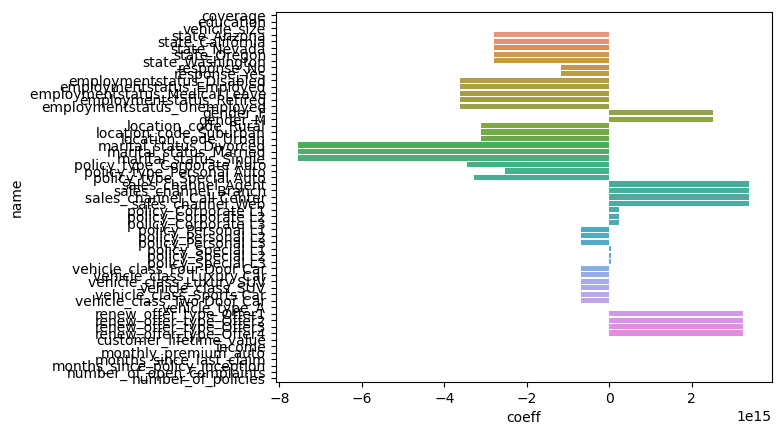

In [79]:
sns.barplot(y= fi_df['name'], x = fi_df['coeff'])